## Setup

In [1]:
from IPython.display import clear_output

!pip install transformers
!pip install wordcloud

clear_output()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Teknofest/NLP/teknofest_train_final.csv", sep="|")

## EDA

In [5]:
df

,id,text,is_offensive,target
0,81c11060-a240-4d54-841b-9e2916039e85,çürük dişli,1,INSULT
1,be80ebbf-b322-4c3b-afa1-94932ea80731,Bu adamın islama ve müslümanlara verdiği zarar...,1,RACIST
2,f99e2513-83ed-4076-ac72-b9e2cff3f049,erkekler zora gelmez,1,SEXIST
3,83ed2b2e-b815-4f36-9fc4-80a9050cf2d0,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1,PROFANITY
4,d93e05f7-bfdd-4cdb-99d8-3048761b30ff,otomasyon< sistemlerine= doğrudan bağlanabilir,0,OTHER
...,...,...,...,...
12612,71eedfa1-8fa6-425c-b982-258c3b29c003,uyuma taklidi yapan tehlikeli bir hayvanın göz...,0,OTHER
12613,b38eed16-6501-4563-8b33-ff2e634bb8e5,yolda at kavga eden üç oğlan çocuğu görür,0,OTHER
12614,c8a051a8-94ef-4b64-a48e-54d0fa4f8323,sizin köpeklerinizin burnu bile daha iyi koku ...,0,OTHER
12615,513a7e6d-4207-4a16-9b47-972f26e23cfe,hayalleri gerçek etmek için birisinin delilik ...,0,OTHER


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12617 entries, 0 to 12616
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            12617 non-null  object
 1   text          12617 non-null  object
 2   is_offensive  12617 non-null  int64 
 3   target        12617 non-null  object
dtypes: int64(1), object(3)
memory usage: 394.4+ KB


In [7]:
len(df.id.unique())

12617

In [8]:
df.is_offensive.value_counts()

1    9018
0    3599
Name: is_offensive, dtype: int64

In [9]:
df.target.value_counts()

OTHER        3616
INSULT       2419
PROFANITY    2398
SEXIST       2112
RACIST       2072
Name: target, dtype: int64

In [10]:
df.loc[df.is_offensive == 0, "target"].value_counts()

OTHER        3544
RACIST         18
SEXIST         13
PROFANITY      12
INSULT         12
Name: target, dtype: int64

In [11]:
df.loc[df.is_offensive == 1, "target"].value_counts()

INSULT       2407
PROFANITY    2386
SEXIST       2099
RACIST       2054
OTHER          72
Name: target, dtype: int64

In [12]:
for is_offensive in [0,1]:

  avg_word_count = df.loc[df.is_offensive == is_offensive, "text"].apply(lambda x: len(x.split())).mean()
  print(is_offensive, "avg word count: ", avg_word_count)

0 avg word count:  8.257571547652125
1 avg word count:  5.276003548458638


In [13]:
for target in df.target.unique().tolist():

  avg_word_count = df.loc[df.target == target, "text"].apply(lambda x: len(x.split())).mean()
  print(target, "avg word count: ", avg_word_count)

INSULT avg word count:  4.75155022736668
RACIST avg word count:  5.840733590733591
SEXIST avg word count:  5.520833333333333
PROFANITY avg word count:  5.01417848206839
OTHER avg word count:  8.301438053097344


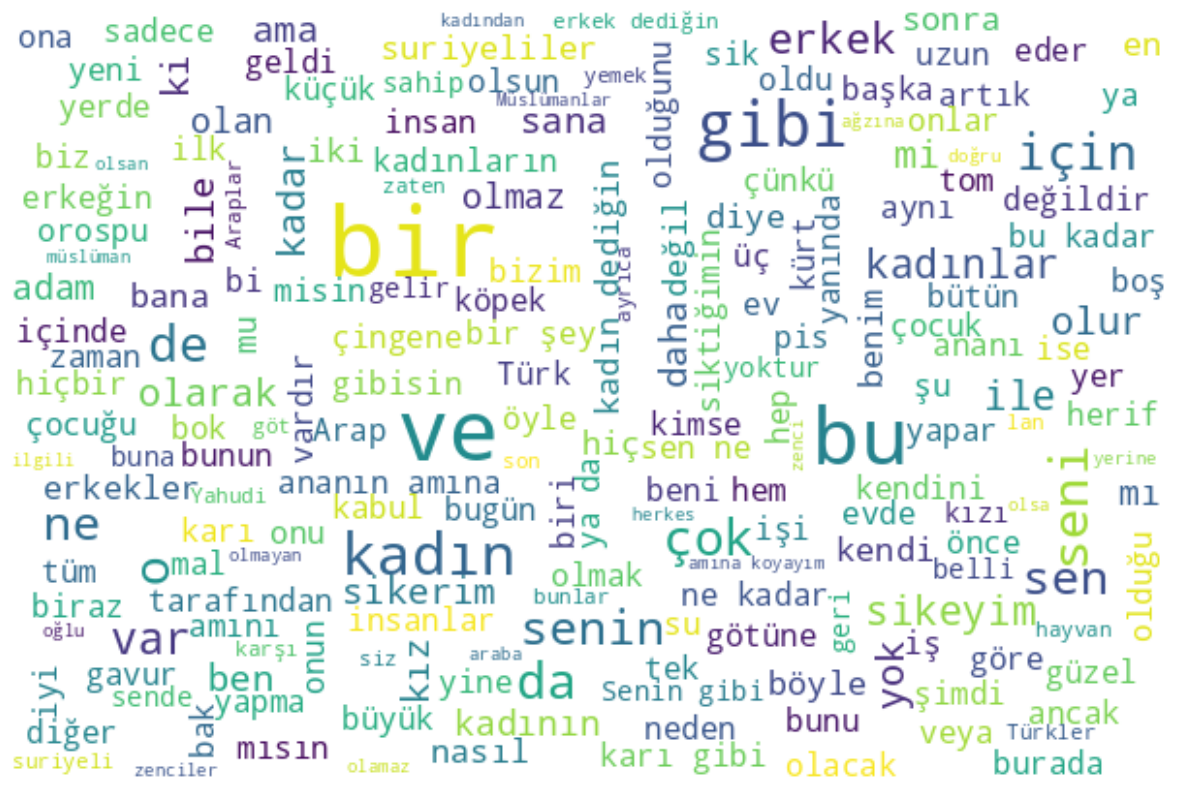

In [14]:
text = " ".join(txt for txt in df.text)

wordcloud = WordCloud(max_font_size=50, width=600, height=400, background_color="white").generate(text)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

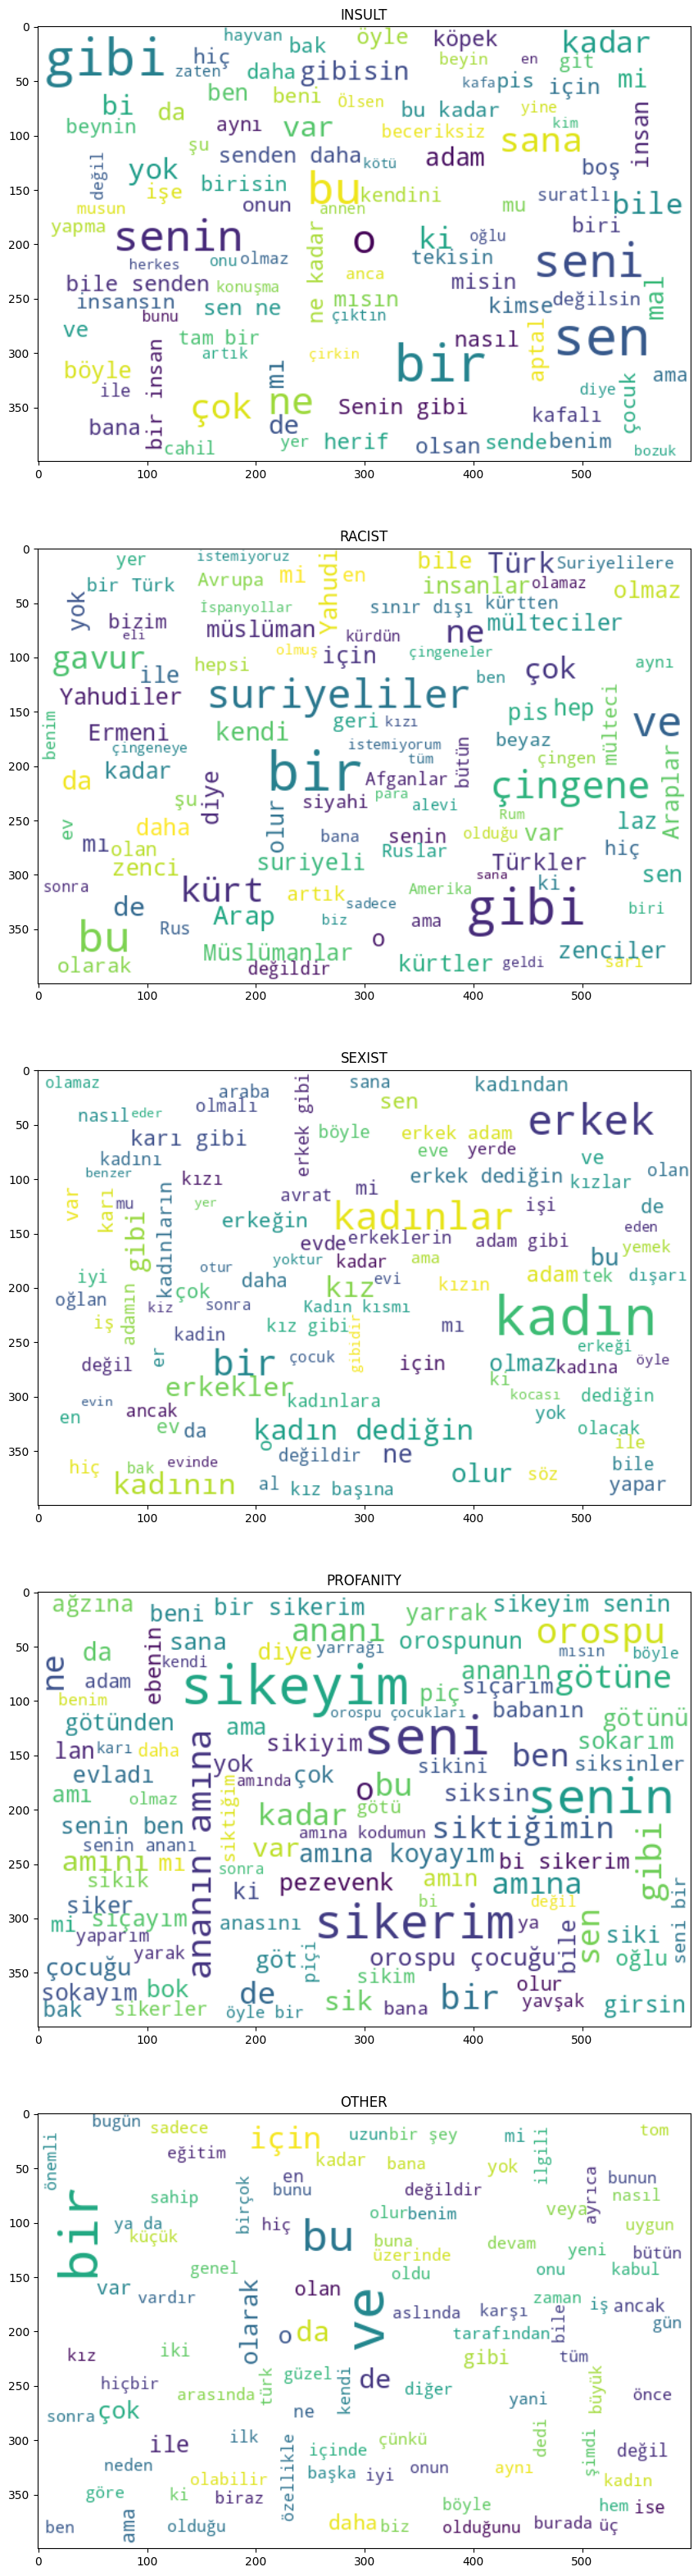

In [15]:
fig, axs = plt.subplots(5, 1, figsize=(20,40))

for idx, target in enumerate(df.target.unique().tolist()):

  text = " ".join(txt for txt in df.loc[df.target == target, "text"])
  wordcloud = WordCloud(max_font_size=50, max_words=100, width=600, height=400, background_color="white").generate(text)

  axs[idx].imshow(wordcloud, interpolation='bilinear')
  axs[idx].set_title(target)

In [16]:
df.loc[df.text.apply(lambda x: len(x) == 0)]

,id,text,is_offensive,target


In [17]:
df.loc[df.text.apply(lambda x: len(x) == 1)]

,id,text,is_offensive,target
12340,e2d954b7-266d-43be-845e-015a8ecf1241,j,0,RACIST
12341,697c1629-d4f6-4e85-87f6-3fa5510f55cf,k,1,RACIST
12342,f760cf45-ad05-46e7-9971-2b515decae97,e,1,RACIST
12343,03307826-defb-4e34-aa5a-b74ca74c84c2,e,0,RACIST
12344,42bf5d9d-48ab-489f-a673-d6d792f97eb9,b,0,SEXIST
...,...,...,...,...
12485,65ca945d-15af-4d59-8d7d-b731578e45d8,e,1,PROFANITY
12486,593b9691-8287-4400-bb22-ca2add665b9a,j,0,OTHER
12487,6d93aea2-8130-4168-81ea-bd8557ce3272,b,1,OTHER
12488,b89720e0-fdf3-44c8-ae20-14e8fe2d94af,h,0,OTHER


In [18]:
df.loc[df.text.apply(lambda x: len(x) == 2)]

,id,text,is_offensive,target


In [19]:
df.loc[df.text.apply(lambda x: len(x) == 3)]

,id,text,is_offensive,target


In [20]:
df.loc[df.text.apply(lambda x: len(x) == 4)]

,id,text,is_offensive,target


In [21]:
df.loc[df.text.apply(lambda x: len(x) == 5)]

,id,text,is_offensive,target
158,928b78c5-d30c-4abe-8670-f49cde0b8a8f,sokuk,1,PROFANITY


#### Drop rows that texts has 1 char

In [22]:
df = df.drop(df.loc[df.text.apply(lambda x: len(x) == 1)].index)

In [23]:
df.loc[df.is_offensive == 0, "target"].value_counts()

OTHER    3528
Name: target, dtype: int64

In [24]:
df.loc[df.is_offensive == 1, "target"].value_counts()

INSULT       2393
PROFANITY    2376
SEXIST       2081
RACIST       2033
OTHER          56
Name: target, dtype: int64

#### Fix 'is_offensive' value for mismatch rows

In [25]:
df.loc[(df.is_offensive == 1) & (df.target == "OTHER"), "is_offensive"] = 0

## Model

In [26]:
data = df.copy()

In [27]:
!pip install torchmetrics

clear_output()

In [28]:
from tqdm import tqdm

import torch
import torchmetrics
from torch.utils.data import Dataset, DataLoader
from transformers import BertConfig, BertForSequenceClassification, BertTokenizerFast, AdamW

In [29]:
class CFG:
  model_path = "dbmdz/bert-base-turkish-cased"
  max_length = 300
  batch_size = 8
  device = "cuda"
  num_labels = 2

### Case 1: Is Offensive?

In [30]:
data.drop(["id", "target"], axis=1, inplace=True)
data.rename(columns={"is_offensive": "labels"}, inplace=True)

train = data.loc[:10000].reset_index().drop("index", axis=1)
val = data.loc[10000:11000].reset_index().drop("index", axis=1)
test = data.loc[11000:].reset_index().drop("index", axis=1)

In [31]:
tokenizer = BertTokenizerFast.from_pretrained(CFG.model_path)

In [32]:
train_encodings = tokenizer(train["text"].values.tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val["text"].values.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test["text"].values.tolist(), truncation=True, padding=True)

In [33]:
class AcikHackDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self,idx):
        item = {key: torch.tensor(value[idx]) for key, value in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

In [34]:
train_dataset = AcikHackDataset(train_encodings, train["labels"])
val_dataset = AcikHackDataset(val_encodings, val["labels"])
test_dataset = AcikHackDataset(test_encodings, test["labels"])

In [35]:
config = BertConfig(num_labels=CFG.num_labels)

model = BertForSequenceClassification.from_pretrained(CFG.model_path)
model.to(CFG.device)

clear_output()

In [36]:
train_dataloader = DataLoader(train_dataset, batch_size=CFG.batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=CFG.batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=CFG.batch_size, shuffle=False)

In [37]:
optim = AdamW(model.parameters(), lr=5e-5)
metric = torchmetrics.classification.BinaryF1Score(average="macro").to(CFG.device)

In [38]:
model.train()

for batch in tqdm(train_dataloader):
    input_ids = batch['input_ids'].to(CFG.device)
    attention_mask = batch['attention_mask'].to(CFG.device)
    labels = batch['labels'].to(CFG.device)

    outputs = model(input_ids=input_ids, 
                    attention_mask=attention_mask, 
                    labels=labels)

    optim.zero_grad()

    loss = outputs.loss
    loss.backward()

    optim.step()
    break

  0%|          | 0/1251 [00:01<?, ?it/s]


In [39]:
input_ids.shape, attention_mask.shape, labels.shape

(torch.Size([8, 52]), torch.Size([8, 52]), torch.Size([8]))

In [40]:
def train_fn(model, train_dataloader):
    model.train()

    for batch in tqdm(train_dataloader):
        input_ids = batch['input_ids'].to(CFG.device)
        attention_mask = batch['attention_mask'].to(CFG.device)
        labels = batch['labels'].to(CFG.device)

        outputs = model(input_ids=input_ids, 
                        attention_mask=attention_mask, 
                        labels=labels)

        optim.zero_grad()

        loss = outputs.loss
        loss.backward()

        optim.step()

In [41]:
def test_fn(model, dataloader):
    model.eval()
    with torch.inference_mode():
        for batch in tqdm(dataloader):

            input_ids = batch['input_ids'].to(CFG.device)
            attention_mask = batch['attention_mask'].to(CFG.device)
            labels = batch['labels'].to(CFG.device)

            outputs = model(input_ids=input_ids, 
                            attention_mask=attention_mask,
                            labels=labels)

            logits = torch.argmax(outputs.logits, dim=-1)
            f1_score = metric(logits, labels).item()

    return metric.compute().item()

In [42]:
model.train()

for epoch in range(3):
    print("\n")
    print("Epoch", epoch)

    print("Train step")
    train_fn(model, train_dataloader)

    print("Val step")
    test_fn(model, val_dataloader)

    print("\n")
    print("F1 Score:", metric.compute().item())

    metric.reset()



Epoch 0
Train step


100%|██████████| 1251/1251 [02:15<00:00,  9.22it/s]


Val step


100%|██████████| 126/126 [00:02<00:00, 49.44it/s]




F1 Score: 0.9840610027313232


Epoch 1
Train step


100%|██████████| 1251/1251 [02:09<00:00,  9.64it/s]


Val step


100%|██████████| 126/126 [00:02<00:00, 49.72it/s]




F1 Score: 0.969131350517273


Epoch 2
Train step


100%|██████████| 1251/1251 [02:10<00:00,  9.61it/s]


Val step


100%|██████████| 126/126 [00:02<00:00, 49.03it/s]



F1 Score: 0.9859747290611267


In [43]:
print("Test step")
test_fn(model, test_dataloader)

print("\n")
print("F1 Score:",metric.compute().item())

Test step


100%|██████████| 184/184 [00:05<00:00, 33.98it/s]



F1 Score: 0.9418777823448181


### Case 2: Offensive Type

In [44]:
data = df.copy()

In [45]:
CFG.num_labels = 4

In [46]:
data = data.loc[data.target != "OTHER"]

data.loc[data.target == "INSULT", "target"] = 0
data.loc[data.target == "PROFANITY", "target"] = 1
data.loc[data.target == "SEXIST", "target"] = 2
data.loc[data.target == "RACIST", "target"] = 3

data.target = data.target.astype(int)

In [47]:
data.drop(["id", "is_offensive"], axis=1, inplace=True)
data.rename(columns={"target": "labels"}, inplace=True)

train = data.loc[:7000].reset_index().drop("index", axis=1)
val = data.loc[7000:7800].reset_index().drop("index", axis=1)
test = data.loc[7800:].reset_index().drop("index", axis=1)

In [48]:
tokenizer = BertTokenizerFast.from_pretrained(CFG.model_path)

In [49]:
train_encodings = tokenizer(train["text"].values.tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val["text"].values.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test["text"].values.tolist(), truncation=True, padding=True)

In [50]:
class AcikHackDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self,idx):
        item = {key: torch.tensor(value[idx]) for key, value in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

In [51]:
train_dataset = AcikHackDataset(train_encodings, train["labels"])
val_dataset = AcikHackDataset(val_encodings, val["labels"])
test_dataset = AcikHackDataset(test_encodings, test["labels"])

In [52]:
model = BertForSequenceClassification.from_pretrained(CFG.model_path, 
                                                      num_labels=CFG.num_labels
                                                      ).to(CFG.device)

clear_output()

In [53]:
train_dataloader = DataLoader(train_dataset, batch_size=CFG.batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=CFG.batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=CFG.batch_size, shuffle=False)

In [54]:
optim = AdamW(model.parameters(), lr=5e-5)
metric = torchmetrics.classification.MulticlassF1Score(num_classes=CFG.num_labels, 
                                                       average="macro"
                                                       ).to(CFG.device)

In [55]:
def train_fn(model, train_dataloader):
    model.train()

    for batch in tqdm(train_dataloader):
        input_ids = batch['input_ids'].to(CFG.device)
        attention_mask = batch['attention_mask'].to(CFG.device)
        labels = batch['labels'].to(CFG.device)

        outputs = model(input_ids=input_ids, 
                        attention_mask=attention_mask, 
                        labels=labels)

        optim.zero_grad()

        loss = outputs.loss
        loss.backward()

        optim.step()

In [56]:
def test_fn(model, dataloader):
    model.eval()
    with torch.inference_mode():
        for batch in tqdm(dataloader):

            input_ids = batch['input_ids'].to(CFG.device)
            attention_mask = batch['attention_mask'].to(CFG.device)
            labels = batch['labels'].to(CFG.device)

            outputs = model(input_ids=input_ids, 
                            attention_mask=attention_mask,
                            labels=labels)

            logits = torch.argmax(outputs.logits, dim=1)
            f1_score = metric(logits, labels).item()

    return metric.compute().item()

In [57]:
for epoch in range(3):
    print("\n")
    print("Epoch", epoch)

    print("Train step")
    train_fn(model, train_dataloader)

    print("Val step")
    test_fn(model, val_dataloader)

    print("\n")
    print("F1 Score:", metric.compute().item())

    metric.reset()



Epoch 0
Train step


100%|██████████| 630/630 [01:05<00:00,  9.56it/s]


Val step


100%|██████████| 74/74 [00:01<00:00, 63.95it/s]




F1 Score: 0.9566340446472168


Epoch 1
Train step


100%|██████████| 630/630 [01:05<00:00,  9.62it/s]


Val step


100%|██████████| 74/74 [00:01<00:00, 59.84it/s]




F1 Score: 0.9618203639984131


Epoch 2
Train step


100%|██████████| 630/630 [01:05<00:00,  9.61it/s]


Val step


100%|██████████| 74/74 [00:01<00:00, 63.40it/s]



F1 Score: 0.9464325904846191


In [58]:
print("Test step")
test_fn(model, test_dataloader)

print("\n")
print("F1 Score:",metric.compute().item())

Test step


100%|██████████| 408/408 [00:08<00:00, 49.51it/s]



F1 Score: 0.933422863483429
